<a href="https://colab.research.google.com/github/astromad/MyDeepLearningRepo/blob/master/HOML_ch10_Regression_multi_in_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
def load_dataset():
  print('----Loading Data----')
  housing = fetch_california_housing()
  X_train_full,X_test, Y_train_full,Y_test = train_test_split(housing.data,housing.target)
  X_train,X_valid, Y_train,Y_valid = train_test_split(X_train_full,Y_train_full)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_valid = scaler.transform(X_valid)
  X_test = scaler.transform(X_test)

  print('Full training set shape',X_train_full.shape)
  print('Full test set shape',X_test.shape)
  print('training set shape',X_train.shape)
  print('validation set shape',X_valid.shape)
  return (X_train, Y_train), (X_valid, Y_valid), (X_test,Y_test)

In [12]:
def build_model(name='Default Model'):
  print('----Building Model----')
  
  inputA=keras.layers.Input(shape=[5],name='wide_input')
  inputB=keras.layers.Input(shape=[6],name='deep_input')

  hidden1 =keras.layers.Dense(30,activation='relu',name='L_dense1')(inputB)
  hidden2 =keras.layers.Dense(30,activation='relu',name='L_dense2')(hidden1)
  concat = keras.layers.Concatenate()([inputA,hidden2])
  output1 = keras.layers.Dense(1,name='L_output1')(concat)
  output2 = keras.layers.Dense(1,name='L_output2')(hidden2)

  model = keras.Model(inputs=[inputA,inputB], outputs=[output1,output2],name='My_Regression_Model_multi_in_out')
  return model

In [4]:
def displayModelGraph(model):
  print('----Displaying Model Graph----')
  print(model.summary())
  print(model.layers)
  keras.utils.plot_model(model, to_file=model.name+'.png')
  #SVG(keras.utils.model_to_dot(model).create(prog='dot', format='svg'))
  img=mpimg.imread(model.name+'.png')
  imgplot = plt.imshow(img)
  plt.show()

In [5]:
def modelPredict(model, X_test, Y_test, samples=3):
  print('----Predicting Model----')
  X_new = X_test[:samples]
  Y_prob = model.predict(X_new)
  print("Probability from Model:")
  print(Y_prob.round(2))
  # Y_pred = model.predict_classes(X_new)
  # print(Y_pred)
  Y_pred = np.argmax(Y_prob, axis=-1)
  # print(Y_pred)
  #print("prediction from Model:")
  #print(np.array(classes)[Y_pred].reshape(-1, 1))
  print('Label data:')
  print(Y_test[:samples])

In [6]:
def showWeights(model,layer=0):
  print('----Display Weights----')
  weights,biasses = model.layers[layer].get_weights()
  print('weights shape',weights.shape)
  print('bias shape',biasses.shape)
  print(weights[0])
  print(biasses)

In [7]:
def displayLoss(history):
  print('----Plotting Loss----')
  pd.DataFrame(history.history).plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()

In [8]:
def evaluateModel(model,X_test,Y_test):
  print('----Evaluating Model----')
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Model evaluation on test set:')
  print(f'Test loss: {score}')

In [9]:
def plot_history(history):
  print('----Plotting Loss----')
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(loss) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

In [10]:
def main():
  print('Tensorflow Version',tf.__version__)
  print('Keras Version',keras.__version__)
  (X_train, Y_train), (X_valid,Y_valid), (X_test, Y_test) = load_dataset()
  X_train_A,X_train_B = X_train[:, :5],X_train[:, 2:]
  X_valid_A,X_valid_B = X_valid[:, :5],X_valid[:, 2:]
  X_test_A,X_test_B = X_test[:, :5],X_test[:, 2:]

  model = build_model(name='My_Regression_Model_multi_in_out')
  displayModelGraph(model)
  showWeights(model,layer=1)
  model.compile(loss=['mse','mse'], loss_weights=[0.9,0.1],optimizer=keras.optimizers.SGD(lr=1e-3))
  history= model.fit([X_train_A,X_train_B],[Y_train,Y_train],epochs=30,validation_data=([X_valid_A,X_valid_B],[Y_valid,Y_valid]))
  displayLoss(history)
  plot_history(history)
  score = model.evaluate([X_test_A,X_test_B], [Y_test,Y_test], verbose=0)
  print('Model evaluation on test set:')
  print(f'Test loss: {score}')
  Y_pred_main,Y_pred_aux = model.predict([X_test_A[:3],X_test_B[:3]])
  

Tensorflow Version 2.2.0
Keras Version 2.3.0-tf
----Loading Data----
Full training set shape (15480, 8)
Full test set shape (5160, 8)
training set shape (11610, 8)
validation set shape (3870, 8)
----Building Model----
----Displaying Model Graph----
Model: "My_Regression_Model_multi_in_out"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
L_dense1 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
________________

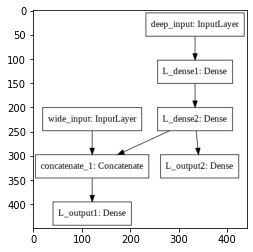

----Display Weights----
weights shape (6, 30)
bias shape (30,)
[-0.00120637  0.03138798 -0.28429317 -0.24863343 -0.11530709  0.07693034
 -0.34892744  0.246809    0.33890486  0.37809724 -0.23434587  0.1777597
 -0.38344762  0.02795637 -0.11000648 -0.13104677 -0.24368204 -0.3692012
  0.14639431 -0.3254675  -0.18241848 -0.3939737  -0.14956087  0.18433392
  0.10035843  0.09281427 -0.17256157  0.33723098 -0.0051108   0.39483172]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.7005 - L_output1_loss: 2.4469 - L_output2_loss: 4.9828 - val_loss: 1.4828 - val_L_output1_loss: 1.1988 - val_L_output2_loss: 4.0390
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 1.1800 - L_output1_loss: 0.9572 - L_output2_loss: 3.1850 - val_loss: 1.0295 - val_L_output1_loss: 0.8551 - val_L_output2_loss: 2.5999
Epoch 3/30
363/363 [==============================] - 1s 2ms/ste

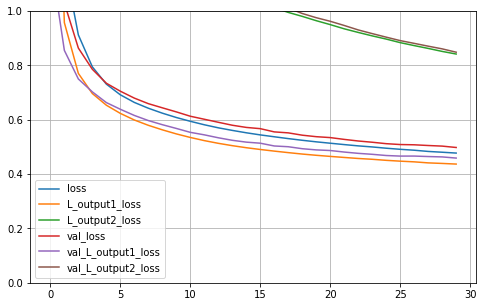

----Plotting Loss----
Model evaluation on test set:
Test loss: [0.473802775144577, 0.4342402517795563, 0.8298637866973877]


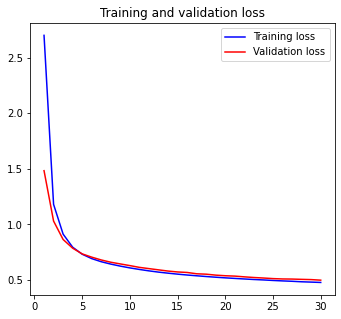

In [13]:
main()